# Gradient Boosted Tree Model with XGBoost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import plot_tree
from xgboost import to_graphviz
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import graphviz

## No Null value dataset

**Note:** XGB can't work with Polars

In [2]:
df = pd.read_parquet("ETL/fts_nonull.parquet")

In [3]:
df.set_index("respondent_id", inplace=True)

In [4]:
df=df[:].astype("category")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19642 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   h1n1_concern                 19642 non-null  category
 1   h1n1_knowledge               19642 non-null  category
 2   behavioral_antiviral_meds    19642 non-null  category
 3   behavioral_avoidance         19642 non-null  category
 4   behavioral_face_mask         19642 non-null  category
 5   behavioral_wash_hands        19642 non-null  category
 6   behavioral_large_gatherings  19642 non-null  category
 7   behavioral_outside_home      19642 non-null  category
 8   behavioral_touch_face        19642 non-null  category
 9   doctor_recc_h1n1             19642 non-null  category
 10  doctor_recc_seasonal         19642 non-null  category
 11  chronic_med_condition        19642 non-null  category
 12  child_under_6_months         19642 non-null  category
 13  health

In [6]:
X = df.drop(columns=["h1n1_vaccine", "seasonal_vaccine"])
y1 = df["h1n1_vaccine"]
y2 = df["seasonal_vaccine"]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42, stratify=y1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42, stratify=y2)

y1: h1n1 labels

y2: seasonal labels

In [7]:
clf = XGBClassifier(random_state=8, enable_categorical=True)

In [8]:
# Hyperparameter tuning
search_space = {
    'max_depth': Integer(1, 6),
    'learning_rate': Real(0.001, 1.0),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
    'colsample_bylevel': Real(0.5, 1.0),
    'colsample_bynode': Real(0.5, 1.0),
    'alpha': Real(0.0, 1.0),
    'lambda': Real(0.0, 1.0),
    'gamma': Real(0.0, 1.0),
    #'sampling_method': Categorical('uniform'),
}

opt = BayesSearchCV(
    clf,
    search_space,
    cv=5,
    n_iter=50,
    random_state=42,
    scoring='roc_auc',
    n_jobs=-1
)


In [9]:
opt.fit(X_train1, y_train1)

BayesSearchCV(cv=5,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=True, eval_metric=None,
                                      feature_types=None, gamma=None,
                                      grow_policy=None, importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None,...
                             'gamma': Real(low=0.0, high=1.0, prior='uniform', transform='normalize'),
                             'lambda': Real(low=0.0, high=1.0, prior='uniform', transform='normalize'),
                             'learning_rate': Real(low=0.001, high=1.0, prior='uniform', transform='normalize'),
                             'max_depth': Integer(low=1, high=6, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

In [10]:
opt.best_score_

0.8430562828392084

In [11]:
opt.score(X_test1, y_test1)

0.8479958484569684

In [12]:
opt.predict(X_test1)

array([0, 1, 0, ..., 0, 0, 0])

In [39]:
opt.best_estimator_.save_model("XGB_Model/xgb_no_null_h1n1_vaccine.model")

c:\Users\sager\anaconda3\envs\polars_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:21:33] WARNING: D:\bld\xgboost-split_1730232589250\work\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [40]:
opt.best_estimator_.save_model("XGB_Model/xgb_no_null_h1n1_vaccine.json")

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

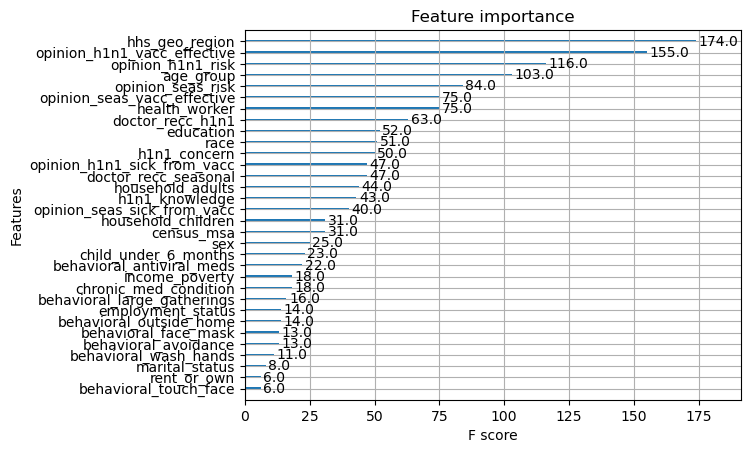

In [14]:
plot_importance(opt.best_estimator_)

In [15]:
# Hyperparameter tuning
search_space = {
    'max_depth': Integer(1, 6),
    'learning_rate': Real(0.001, 1.0),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
    'colsample_bylevel': Real(0.5, 1.0),
    'colsample_bynode': Real(0.5, 1.0),
    'alpha': Real(0.0, 1.0),
    'lambda': Real(0.0, 1.0),
    'gamma': Real(0.0, 1.0),
    #'sampling_method': Categorical('uniform'),
}

opt2 = BayesSearchCV(
    clf,
    search_space,
    cv=5,
    n_iter=50,
    random_state=42,
    scoring='roc_auc',
    n_jobs=-1
)

In [16]:
opt2.fit(X_train2, y_train2)

BayesSearchCV(cv=5,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=True, eval_metric=None,
                                      feature_types=None, gamma=None,
                                      grow_policy=None, importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None,...
                             'gamma': Real(low=0.0, high=1.0, prior='uniform', transform='normalize'),
                             'lambda': Real(low=0.0, high=1.0, prior='uniform', transform='normalize'),
                             'learning_rate': Real(low=0.001, high=1.0, prior='uniform', transform='normalize'),
                             'max_depth': Integer(low=1, high=6, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

In [17]:
print("Best fitting score: ", opt2.best_score_)
print("Test score: ", opt2.score(X_test2, y_test2))

Best fitting score:  0.8641984622852213
Test score:  0.857402737125556


In [18]:
opt2.predict(X_test1)

array([1, 1, 0, ..., 0, 0, 0])

In [41]:
opt2.best_estimator_.save_model("XGB_Model/xgb_no_null_seas_vaccine.model")

c:\Users\sager\anaconda3\envs\polars_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:21:52] WARNING: D:\bld\xgboost-split_1730232589250\work\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [42]:
opt2.best_estimator_.save_model("XGB_Model/xgb_no_null_seas_vaccine.json")

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

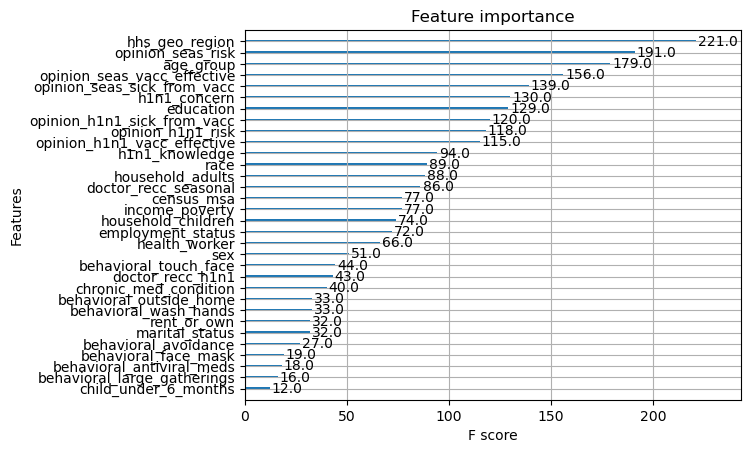

In [20]:
plot_importance(opt2.best_estimator_)

## Null value dataset

In [21]:
df = pd.read_parquet("ETL/fts_null.parquet")

In [22]:
df.set_index("respondent_id", inplace=True)

In [23]:
df=df[:].astype("category")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   h1n1_concern                 26615 non-null  category
 1   h1n1_knowledge               26591 non-null  category
 2   behavioral_antiviral_meds    26636 non-null  category
 3   behavioral_avoidance         26499 non-null  category
 4   behavioral_face_mask         26688 non-null  category
 5   behavioral_wash_hands        26665 non-null  category
 6   behavioral_large_gatherings  26620 non-null  category
 7   behavioral_outside_home      26625 non-null  category
 8   behavioral_touch_face        26579 non-null  category
 9   doctor_recc_h1n1             24547 non-null  category
 10  doctor_recc_seasonal         24547 non-null  category
 11  chronic_med_condition        25736 non-null  category
 12  child_under_6_months         25887 non-null  category
 13  health

In [25]:
X = df.drop(columns=["h1n1_vaccine", "seasonal_vaccine"])
y1 = df["h1n1_vaccine"]
y2 = df["seasonal_vaccine"]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42, stratify=y1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42, stratify=y2)

y1: h1n1 labels

y2: seasonal labels

In [26]:
clf = XGBClassifier(random_state=8, enable_categorical=True)

In [27]:
# Hyperparameter tuning
search_space = {
    'max_depth': Integer(1, 6),
    'learning_rate': Real(0.001, 1.0),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
    'colsample_bylevel': Real(0.5, 1.0),
    'colsample_bynode': Real(0.5, 1.0),
    'alpha': Real(0.0, 1.0),
    'lambda': Real(0.0, 1.0),
    'gamma': Real(0.0, 1.0),
    #'sampling_method': Categorical('uniform'),
}

nopt = BayesSearchCV(
    clf,
    search_space,
    cv=5,
    n_iter=50,
    random_state=42,
    scoring='roc_auc',
    n_jobs=-1
)

In [28]:
nopt.fit(X_train1, y_train1)

BayesSearchCV(cv=5,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=True, eval_metric=None,
                                      feature_types=None, gamma=None,
                                      grow_policy=None, importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None,...
                             'gamma': Real(low=0.0, high=1.0, prior='uniform', transform='normalize'),
                             'lambda': Real(low=0.0, high=1.0, prior='uniform', transform='normalize'),
                             'learning_rate': Real(low=0.001, high=1.0, prior='uniform', transform='normalize'),
                             'max_depth': Integer(low=1, high=6, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

In [29]:
print("Best fitting score: ", nopt.best_score_)
print("Test score: ", nopt.score(X_test1, y_test1))

Best fitting score:  0.8395730750825775
Test score:  0.8364037700957812


In [30]:
nopt.predict(X_test1)

array([0, 1, 0, ..., 1, 0, 0])

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

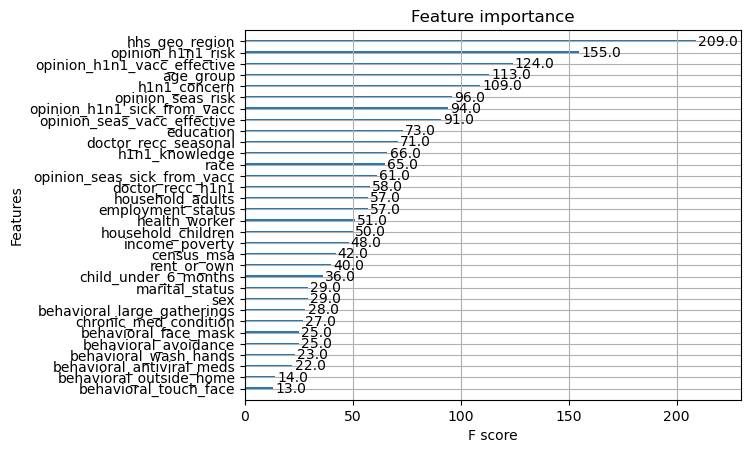

In [32]:
plot_importance(nopt.best_estimator_)

In [43]:
nopt.best_estimator_.save_model("XGB_Model/xgb_null_h1n1_vaccine.model")

c:\Users\sager\anaconda3\envs\polars_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:22:12] WARNING: D:\bld\xgboost-split_1730232589250\work\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [44]:
nopt.best_estimator_.save_model("XGB_Model/xgb_null_h1n1_vaccine.json")

In [33]:
# Hyperparameter tuning
search_space = {
    'max_depth': Integer(1, 6),
    'learning_rate': Real(0.001, 1.0),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
    'colsample_bylevel': Real(0.5, 1.0),
    'colsample_bynode': Real(0.5, 1.0),
    'alpha': Real(0.0, 1.0),
    'lambda': Real(0.0, 1.0),
    'gamma': Real(0.0, 1.0),
    #'sampling_method': Categorical('uniform'),
}

nopt2 = BayesSearchCV(
    clf,
    search_space,
    cv=5,
    n_iter=50,
    random_state=42,
    scoring='roc_auc',
    n_jobs=-1
)

In [34]:
nopt2.fit(X_train2, y_train2)

BayesSearchCV(cv=5,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=True, eval_metric=None,
                                      feature_types=None, gamma=None,
                                      grow_policy=None, importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None,...
                             'gamma': Real(low=0.0, high=1.0, prior='uniform', transform='normalize'),
                             'lambda': Real(low=0.0, high=1.0, prior='uniform', transform='normalize'),
                             'learning_rate': Real(low=0.001, high=1.0, prior='uniform', transform='normalize'),
                             'max_depth': Integer(low=1, high=6, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

In [35]:
print("Best fitting score: ", nopt2.best_score_)
print("Test score: ", nopt2.score(X_test2, y_test2))

Best fitting score:  0.8556310672276701
Test score:  0.8614396965798333


In [36]:
nopt2.predict(X_test2)

array([0, 1, 0, ..., 1, 0, 0])

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

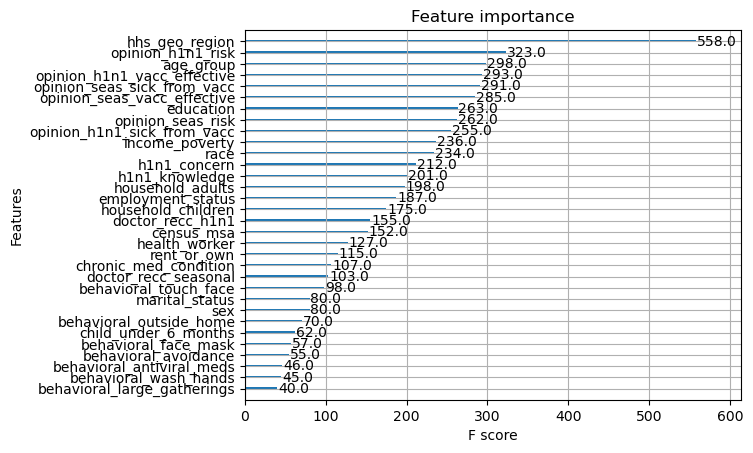

In [38]:
plot_importance(nopt2.best_estimator_)

In [45]:
nopt2.best_estimator_.save_model("XGB_Model/xgb_null_seas_vaccine.model")

c:\Users\sager\anaconda3\envs\polars_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:22:22] WARNING: D:\bld\xgboost-split_1730232589250\work\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [46]:
nopt2.best_estimator_.save_model("XGB_Model/xgb_null_seas_vaccine.json")

# Submission Data

In [ ]:
df_test_set_features = pd.read_csv('Data/test_set_features.csv', index_col='respondent_id')

In [ ]:
null_h1n1_vaccine_probability=nopt.predict_proba(df_test_set_features)
null_seas_vaccine_probability=nopt2.predict_proba(df_test_set_features)

df_submission = 

array([1, 1, 0, ..., 0, 0, 0])

In [47]:
# Opt

In [ ]:
no_null_h1n1_vaccine_probability=opt.predict_proba(X_test1)[:,1]

In [ ]:
no_null_seas_vaccine_probability=opt2.predict_proba(X_test1)[:,1]

In [ ]:
# Nopt

In [ ]:
null_h1n1_vaccine_probability=nopt.predict_proba(X_test1)[:,1]

In [ ]:
null_seas_vaccine_probability=nopt2.predict_proba(X_test2)[:,1]